In [89]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [90]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [91]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [92]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape, y.shape

((30, 1), (30,))

In [93]:

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [94]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [95]:
prediction = regressor.predict(X_test)
# acc = metrics.accuracy_score(Y_test, prediction)
print(prediction)
print(Y_test)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


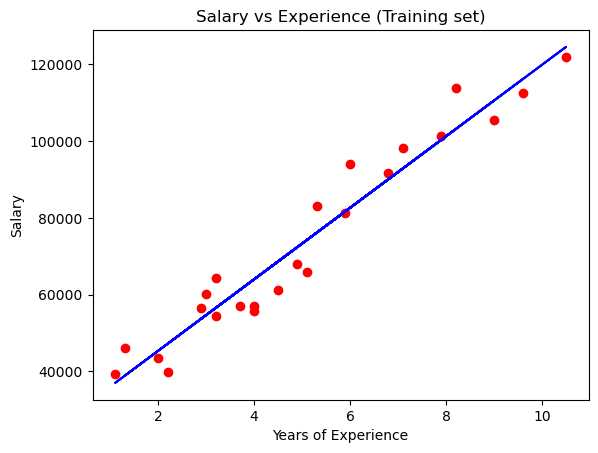

In [96]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

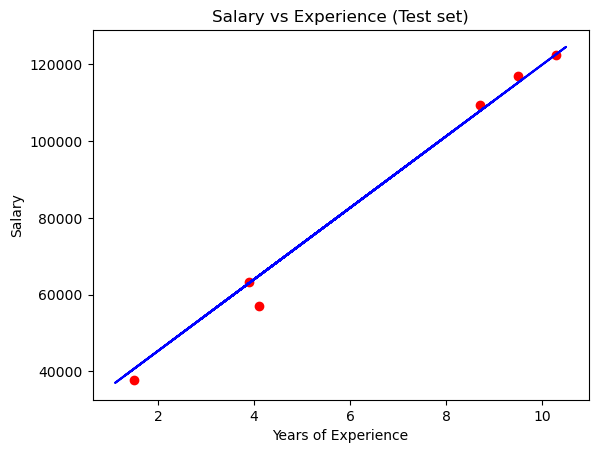

In [97]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Error Metrics:
- Mean Absolute Error (MAE)
- Mean Bias Error (MBE)
- Relative Absolute Error (RAE)
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Relative Squared Error (RSE)
- Normalized Root Mean Squared Error (NRMSE)
- Relative Root Mean Squared Error (RRMSE)
- Root Mean Squared Logarithmic Error (RMSLE)
- Hyber Loss
- Log Cosh Loss
- Quantile Loss

In [98]:
df = pd.read_csv("insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
x = df.iloc[:, [0,2,3]].values
y = df.iloc[:,-1].values

<Axes: xlabel='age'>

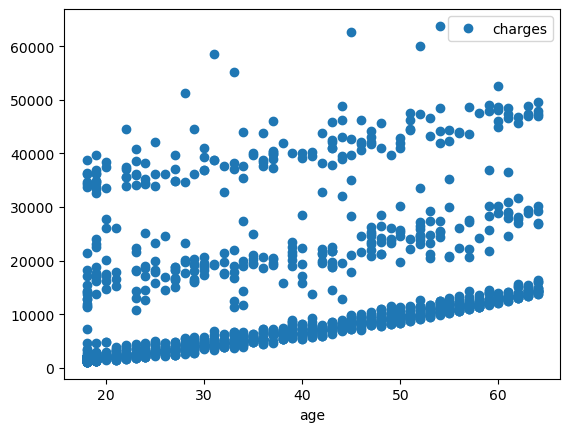

In [100]:
df.plot(x='age', y='charges', style='o')

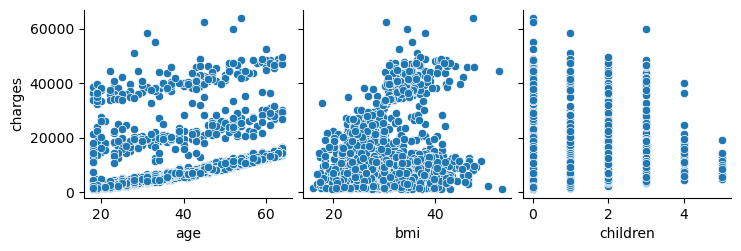

In [101]:
sns.pairplot(df,y_vars='charges', x_vars=['age', 'bmi', 'children'])

In [102]:
charge_model = smf.ols("charges ~ age + bmi + children", data=df).fit()
charge_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.80e-37
Time:                        18:28:43   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

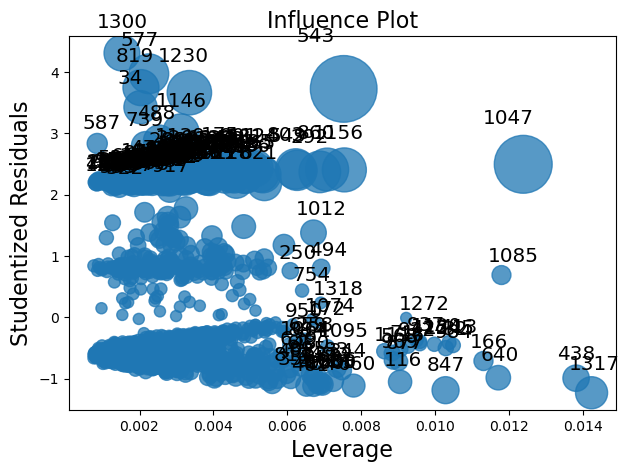

In [103]:
fig = sm.graphics.influence_plot(charge_model, criterion='cooks')
fig.tight_layout(pad=1.0)

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [105]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [108]:
prediction = regressor.predict(X_test)
# acc = metrics.accuracy_score(Y_test, prediction)
print(prediction.shape)

(268,)
